In [1]:
#import library packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
psy = pd.read_csv('Youtube01-Psy.csv')
katty = pd.read_csv('Youtube02-KatyPerry.csv')
Lmfao = pd.read_csv('Youtube03-LMFAO.csv')
Eminem = pd.read_csv('Youtube04-Eminem.csv')
shakira = pd.read_csv('Youtube04-Eminem.csv')

In [4]:
data=pd.concat([psy,katty,Lmfao,Eminem,shakira])

In [5]:
data.shape

(2034, 5)

In [6]:
del data['DATE']
del data['COMMENT_ID']
del data['AUTHOR']

In [7]:
data['CLASS'].value_counts()

1    1076
0     958
Name: CLASS, dtype: int64

In [8]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
443     True
444     True
445     True
446     True
447     True
Length: 2034, dtype: bool

In [9]:
data.duplicated().sum()

594

In [13]:
data=data.drop_duplicates()

In [14]:
data['CLASS'].value_counts()

0    740
1    700
Name: CLASS, dtype: int64

In [15]:
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [16]:
data.reset_index(inplace=True)

In [17]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

corpus=[]
for i in range(0, len(data)):
    review=re.sub('^[a-zA-Z][0-9]',' ', str(data['CONTENT'][i]))
    review=review.lower()
    review=review.split()

    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

corpus

['huh, anyway check you[tube] channel: kobyoshi02',
 "hey guy check new channel first vid us monkeys!!! i'm monkey white shirt,pleas leav like comment pleas subscribe!!!!",
 'test say murdev.com',
 'shake sexi ass channel enjoy ^_^ \ufeff',
 'watch?v=vtarggvgtwq check .\ufeff',
 'hey, check new website!! site kid stuff. kidsmediausa . com',
 'subscrib channel \ufeff',
 'turn mute soon came want check views...\ufeff',
 'check channel funni videos!!\ufeff',
 'u should.d check channel tell next!\ufeff',
 'hey subscrib me\ufeff',
 'start read stop. subscrib within one day entir famili die want stay aliv subscrib right now.\ufeff',
 'https://twitter.com/gbphotographygb\ufeff',
 'subscrib like comment\ufeff',
 'pleas like :d https://premium.easypromosapp.com/voteme/19924/616375350\ufeff',
 "hello! like gaming, art videos, scientif experiments, tutorials, lyric videos, much, much that? pleas check channel subscrib it, we'v started, soon hope abl cover expectations... also check we'v got far!\

In [18]:
df=data

In [19]:
type(df['CONTENT'].loc[100])

str

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    1440 non-null   int64 
 1   CONTENT  1440 non-null   object
 2   CLASS    1440 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 33.9+ KB


In [21]:
# Creating the TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features=1500,ngram_range=(1,2))
X=tv.fit_transform(corpus).toarray()

In [24]:
y=pd.get_dummies(df['CLASS'])
y=y.iloc[:,1].values

In [25]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier
model_SVC = RandomForestClassifier()
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

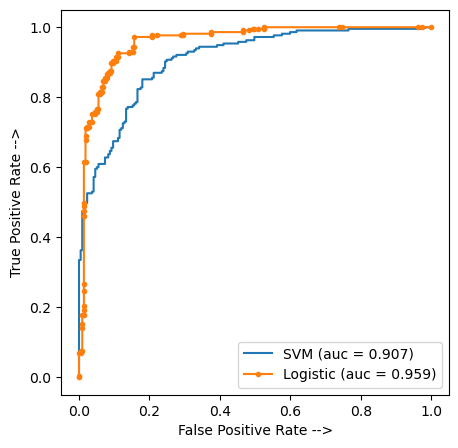

In [29]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

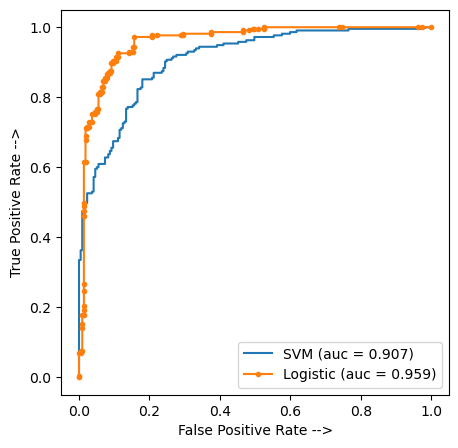

In [33]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()